# Explainable AI (xAI) Models

For Muscle Group Classification, two models had very high results: SVC and Random Tree Classifier. In order to know the models are not only making the right decisions but also making them for the right reasons, we use xAI models to evaluate it.

In [3]:
import pickle
import dice_ml
from dice_ml.utils import helpers  # Import helper functions
from mediapipe_handler import MediaPipeHandler

## Muscle Group Classification

In [5]:
import pandas as pd
import numpy as np

mediapipe_model = MediaPipeHandler()

#training_dataset=mediapipe_model.read_csv_to_pd("/Users/yasinetawfeek/Developer/DesD_AI_pathway/AI/data/train_new.csv")
#testing_dataset=mediapipe_model.read_csv_to_pd("/Users/yasinetawfeek/Developer/DesD_AI_pathway/AI/data/test_new.csv")

training_dataset=mediapipe_model.read_csv_to_pd(r"D:\stuff\uni bruv\Year 3\DESD2\DesD_AI_pathway\AI\data\train_new.csv")
testing_dataset=mediapipe_model.read_csv_to_pd(r"D:\stuff\uni bruv\Year 3\DESD2\DesD_AI_pathway\AI\data\test_new.csv")
"""
Removes original feature and splits it into x,y,z components

"""
def Preprocess_data(dataframe,columns_to_flatten):
    final_df=dataframe.copy()
    # Expanding each column into 3 separate columns (x, y, z) and appending it to the final dataframe.
    for column in columns_to_flatten:
        # print(np.vstack(dataframe[column]).astype(float))
        expanded_df=pd.DataFrame(np.vstack(dataframe[column]).astype(float), 
                           columns=[column+'_x', column+'_y', column+'_z'],
                           index=dataframe.index)
        new_df = pd.concat([dataframe.drop(column, axis=1), expanded_df], axis=1)
        for new_column in new_df.columns:
            final_df[new_column] = new_df[new_column]

    return final_df.drop(columns=columns_to_flatten,axis=1)

"""
Splits dataset into X_train,y_train or X_test,y_test, if you give it training dataset then X_train and y_train

"""
def Return_X_y(dataframe,columns_to_delete):
    X=dataframe.drop(columns=columns_to_delete)
    y=dataframe['muscle_group']
    return X,y

features_to_split=['left_shoulder',
       'right_shoulder', 'left_elbow', 'right_elbow', 'left_wrist',
       'right_wrist', 'left_hip', 'right_hip', 'left_knee',
       'right_knee', 'left_ankle', 'right_ankle']

training_dataset_preprocessed=Preprocess_data(training_dataset,features_to_split)
X_train, y_train = Return_X_y(training_dataset_preprocessed,['label','muscle group','image','Unnamed: 0'])

testing_dataset_preprocessed=Preprocess_data(testing_dataset,features_to_split)
X_test, y_test = Return_X_y(testing_dataset_preprocessed,['label','muscle group','image','Unnamed: 0'])

columns_to_drop = ['left_pinky', 'right_pinky', 'left_index', 'right_index', 'left_thumb',
       'right_thumb', 'left_heel', 'right_heel', 'left_foot_index',
       'right_foot_index']

X_train_feature_eng=X_train.drop(columns=columns_to_drop)
X_test_feature_eng=X_test.drop(columns=columns_to_drop)

current OS working directory is d:\stuff\uni bruv\Year 3\DESD2\DesD_AI_pathway\AI\app
The history saving thread hit an unexpected error (OperationalError('database or disk is full')).History will not be written to the database.


KeyError: 'muscle_group'

In [3]:
joints = features_to_split
features = X_train_feature_eng.columns.tolist()

In [4]:
X_test_feature_eng

,left_shoulder_x,left_shoulder_y,left_shoulder_z,right_shoulder_x,right_shoulder_z,left_elbow_y,left_wrist_y,left_hip_x,left_hip_y,left_hip_z,left_knee_x,left_knee_z,right_knee_z
0,0.721910,0.420462,-0.296496,0.540267,0.016451,0.719355,0.534109,0.629631,0.913307,-0.072432,0.613754,-0.101932,0.416997
1,0.708441,0.429699,-0.374545,0.528477,-0.010646,0.688422,0.502661,0.621732,0.872736,-0.074805,0.603179,0.055334,0.434193
2,0.514813,0.278268,-0.257773,0.504182,0.180725,0.406696,0.427920,0.507605,0.516309,-0.135340,0.489380,-0.173436,0.325247
3,0.497206,0.287982,-0.228493,0.467706,0.146498,0.342323,0.288521,0.502379,0.528920,-0.130180,0.480471,-0.191112,0.200679
4,0.562506,0.242112,0.022503,0.450366,0.052488,0.372436,0.345117,0.536908,0.489133,-0.001139,0.540632,-0.037636,-0.031916
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10027,0.711527,0.370042,-0.112148,0.513904,-0.042675,0.611788,0.759030,0.704804,0.805723,0.021586,0.716539,0.197301,0.201268
10028,0.516811,0.151459,0.046125,0.504311,0.498981,0.240396,0.210850,0.530049,0.394564,-0.147045,0.490613,-0.226344,0.002455
10029,0.506868,0.153212,0.150971,0.525925,0.545939,0.229056,0.211537,0.526690,0.383766,-0.130776,0.504131,-0.220885,-0.082292
10030,0.306599,0.359066,0.205856,0.191600,-0.366252,0.440826,0.429798,0.263205,0.543378,0.183575,0.255391,0.239371,-0.213171


In [5]:
X_test

,left_shoulder_x,left_shoulder_y,left_shoulder_z,right_shoulder_x,right_shoulder_y,right_shoulder_z,left_elbow_x,left_elbow_y,left_elbow_z,right_elbow_x,...,left_heel_z,right_heel_x,right_heel_y,right_heel_z,left_foot_index_x,left_foot_index_y,left_foot_index_z,right_foot_index_x,right_foot_index_y,right_foot_index_z
0,0.721910,0.420462,-0.296496,0.540267,0.389359,0.016451,0.688614,0.719355,-0.320937,0.476870,...,0.048062,0.545982,1.468452,0.808089,0.582782,1.568372,-0.140426,0.505466,1.502201,0.681453
1,0.708441,0.429699,-0.374545,0.528477,0.404475,-0.010646,0.678803,0.688422,-0.464527,0.464564,...,0.359975,0.505234,1.430602,0.893524,0.541847,1.485823,0.179419,0.468513,1.479771,0.738540
2,0.514813,0.278268,-0.257773,0.504182,0.270861,0.180725,0.488859,0.406696,-0.295514,0.503497,...,-0.198333,0.512081,0.680857,0.674289,0.459673,0.932194,-0.316279,0.489766,0.716105,0.700289
3,0.497206,0.287982,-0.228493,0.467706,0.295058,0.146498,0.467368,0.342323,-0.475617,0.438244,...,-0.217120,0.516265,0.845061,0.343015,0.460195,0.933378,-0.334771,0.466243,0.881037,0.279405
4,0.562506,0.242112,0.022503,0.450366,0.236417,0.052488,0.569636,0.372436,-0.085542,0.436324,...,0.229067,0.473472,0.879868,0.226225,0.548904,0.927730,0.039221,0.456958,0.929616,0.038315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10027,0.711527,0.370042,-0.112148,0.513904,0.440355,-0.042675,0.757283,0.611788,-0.014198,0.445851,...,0.645041,0.670391,1.393751,0.595427,0.715455,1.408927,0.513728,0.676198,1.440027,0.440085
10028,0.516811,0.151459,0.046125,0.504311,0.216705,0.498981,0.465216,0.240396,0.042300,0.485949,...,-0.415580,0.519960,0.906296,-0.163135,0.466573,0.958070,-0.498946,0.474309,0.917268,-0.240418
10029,0.506868,0.153212,0.150971,0.525925,0.214986,0.545939,0.469758,0.229056,0.064741,0.507451,...,-0.439418,0.519385,0.926014,-0.280487,0.459895,0.946027,-0.523089,0.442170,0.917267,-0.358668
10030,0.306599,0.359066,0.205856,0.191600,0.345344,-0.366252,0.289922,0.440826,0.055901,0.168860,...,0.420775,0.158088,0.919502,-0.029974,0.319542,0.908096,0.230649,0.241642,0.942041,-0.305432


In [6]:
with open('rcf_feature_eng_model.pkl', 'rb') as f:
    random_tree_model = pickle.load(f)

# with open('model.pkl', 'rb') as f:
#     svc_model = pickle.load(f)

FileNotFoundError: [Errno 2] No such file or directory: 'rcf_feature_eng_model.pkl'

In [ ]:
import shap
explainer = shap.Explainer(random_tree_model.predict, X_train_feature_eng)
shap_values = explainer(X_test_feature_eng[:1000])

PermutationExplainer explainer: 21it [05:39, 16.96s/it]                        


In [ ]:
# Get unique muscle groups
unique_muscle_groups = y_test[:1000].unique()

# Create a dictionary to store the average absolute SHAP values for each muscle group
muscle_group_shap_values = {}

# For each muscle group
for muscle_group in unique_muscle_groups:
    # Get indices where the target is this muscle group
    muscle_group_indices = np.where(y_test[:1000] == muscle_group)[0]
    
    # Get SHAP values for these instances
    muscle_group_shap = shap_values[muscle_group_indices]
    
    # Calculate mean absolute SHAP value for each feature
    mean_abs_shap = np.abs(muscle_group_shap).mean(axis=0)
    
    # Store in dictionary
    muscle_group_shap_values[muscle_group] = mean_abs_shap

# Create a DataFrame with the results
shap_df = pd.DataFrame(muscle_group_shap_values, index=X_test_feature_eng.columns)

# Create a dictionary to map features to their original joints
feature_to_joint = {}
for feature in X_test_feature_eng.columns:
    # Extract the joint name (everything before _x, _y, or _z)
    joint = '_'.join(feature.split('_')[:-1])
    feature_to_joint[feature] = joint

# Calculate joint importance for each muscle group
joint_importance = {}

for muscle_group in unique_muscle_groups:
    joint_scores = {}
    
    # For each joint, sum up the SHAP values of its components
    for joint in set(feature_to_joint.values()):
        # Get all features belonging to this joint
        joint_features = [f for f, j in feature_to_joint.items() if j == joint]
        
        # Sum up absolute SHAP values for all components of this joint
        joint_importance_score = shap_df.loc[joint_features, muscle_group].sum()
        joint_scores[joint] = joint_importance_score
    
    # Sort joints by importance
    sorted_joints = dict(sorted(joint_scores.items(), key=lambda x: x[1], reverse=True))
    joint_importance[muscle_group] = sorted_joints

# Print results for each muscle group
for muscle_group, joint_scores in joint_importance.items():
    print(f"\nMost important joints for {muscle_group}:")
    print("-" * 40)
    
    # Print top 5 most important joints
    for i, (joint, score) in enumerate(joint_scores.items(), 1):
        if i <= 5:  # Only show top 5
            print(f"{i}. {joint}: {score:.4f}")
        else:
            break
    print()

In [ ]:
shap_values

.values =
array([[-8.58055556e-01, -2.11111111e-01,  4.19444444e-02,
         1.90833333e-01, -1.00000000e-02,  3.27777778e-01,
        -2.04166667e-01,  1.00000000e-01, -1.03250000e+00,
         1.55555556e-02, -4.66666667e-02, -1.72222222e-02,
         9.36111111e-02],
       [-8.63611111e-01, -3.74444444e-01,  2.45555556e-01,
         2.64444444e-01, -1.83333333e-02,  2.83611111e-01,
        -2.18055556e-01,  6.11111111e-03, -9.91666667e-01,
         2.13888889e-02, -1.13611111e-01,  3.00000000e-02,
         1.18611111e-01],
       [ 4.72222222e-02, -2.03611111e-01, -3.30555556e-02,
        -2.00833333e-01, -1.93611111e-01, -2.44166667e-01,
        -6.11666667e-01, -2.42777778e-01,  3.01944444e-01,
         6.22222222e-02, -1.27500000e-01, -1.62222222e-01,
        -1.94444444e-03],
       [ 1.01388889e-01, -5.75277778e-01, -2.29722222e-01,
         2.02777778e-02, -3.15277778e-01, -2.66388889e-01,
        -6.20555556e-01, -1.65555556e-01,  5.48611111e-01,
        -7.69444444e-02, -2

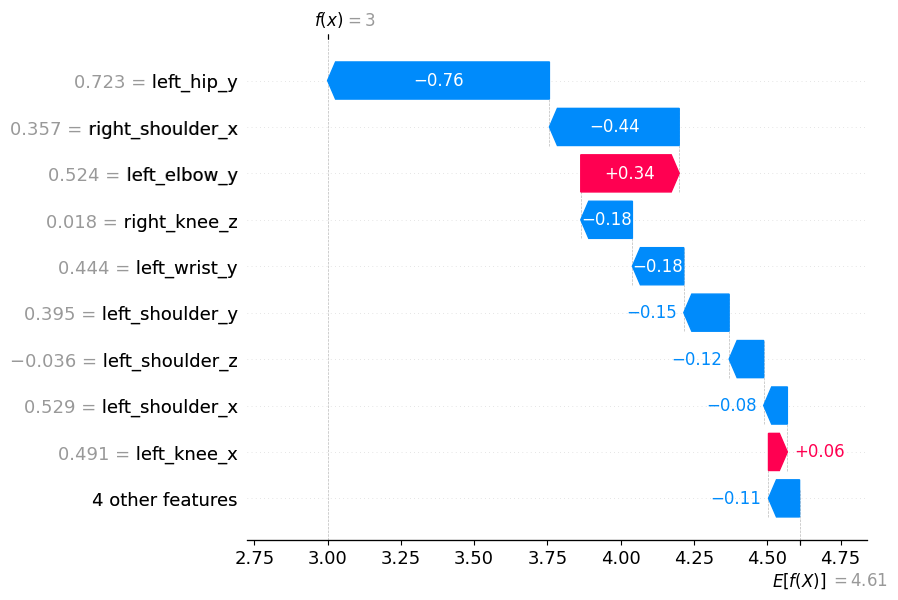

In [ ]:
shap.plots.waterfall(shap_values[], max_display=10)

In [ ]:
data_dice = dice_ml.Data(dataframe=pd.concat([X_train_feature_eng, pd.Series(y_train, name="label")], axis=1),
                         continuous_features=features, outcome_name="label")

model_dice = dice_ml.Model(model=random_tree_model, backend="sklearn")
exp = dice_ml.Dice(data_dice, model_dice, method="random")


In [ ]:
y_test[0]

3

In [ ]:
query_instance = X_test_feature_eng.iloc[[0]]  # Note the double brackets to keep it as DataFrame

cf = exp.generate_counterfactuals(query_instance, total_CFs=1, desired_class=3)
cf.visualize_as_dataframe()

100%|██████████| 1/1 [00:03<00:00,  3.71s/it]

Query instance (original outcome : 3)


,left_shoulder_x,left_shoulder_y,left_shoulder_z,right_shoulder_x,right_shoulder_z,left_elbow_y,left_wrist_y,left_hip_x,left_hip_y,left_hip_z,left_knee_x,left_knee_z,right_knee_z,label
0,0.72191,0.420462,-0.296496,0.540267,0.016451,0.719355,0.534109,0.629631,0.913307,-0.072432,0.613754,-0.101932,0.416997,3



Diverse Counterfactual set (new outcome: 4)


,left_shoulder_x,left_shoulder_y,left_shoulder_z,right_shoulder_x,right_shoulder_z,left_elbow_y,left_wrist_y,left_hip_x,left_hip_y,left_hip_z,left_knee_x,left_knee_z,right_knee_z,label
0,0.72191,0.420462,-0.296496,0.540267,0.016451,0.719355,0.534109,0.629631,-0.398606,0.162103,0.613754,-0.101932,0.416997,4


In [ ]:
X_test_feature_eng.iloc[[0]]

,left_shoulder_x,left_shoulder_y,left_shoulder_z,right_shoulder_x,right_shoulder_z,left_elbow_y,left_wrist_y,left_hip_x,left_hip_y,left_hip_z,left_knee_x,left_knee_z,right_knee_z
0,0.72191,0.420462,-0.296496,0.540267,0.016451,0.719355,0.534109,0.629631,0.913307,-0.072432,0.613754,-0.101932,0.416997


In [ ]:
original = query_instance
counterfactual = cf.cf_examples_list[0].final_cfs_df.iloc[0]

diffs = (counterfactual - original).abs()
important_joints = set()
for joint in joints:
    if any(diffs[f'{joint}_{axis}'] > 0.01 for axis in ['x', 'y', 'z']):
        important_joints.add(joint)

In [ ]:
import matplotlib.pyplot as plt

def plot_skeleton(joint_coords, highlighted_joints=set()):
    connections = [
        ('shoulder', 'elbow'), ('elbow', 'wrist'),
        ('hip', 'knee'), ('shoulder', 'hip')
    ]
    for j1, j2 in connections:
        x = [joint_coords[f'{j1}_x'], joint_coords[f'{j2}_x']]
        y = [joint_coords[f'{j1}_y'], joint_coords[f'{j2}_y']]
        plt.plot(x, y, 'k-', linewidth=2)

    for joint in joints:
        x = joint_coords[f'{joint}_x']
        y = joint_coords[f'{joint}_y']
        color = 'red' if joint in highlighted_joints else 'blue'
        plt.scatter(x, y, c=color, s=100)
        plt.text(x+0.01, y+0.01, joint, fontsize=9)

    plt.gca().invert_yaxis()
    plt.axis('equal')
    plt.title("Skeleton with Important Joints Highlighted")
    plt.show()

plot_skeleton(original.to_dict(), highlighted_joints=important_joints)

## Workout Classification

In [2]:
import pickle
import dice_ml
from dice_ml.utils import helpers  # Import helper functions
from mediapipe_handler import MediaPipeHandler
from get_work_out_labels import add_workout_label_back

import pandas as pd
import numpy as np


In [3]:

mediapipe_model = MediaPipeHandler()

#training_dataset=mediapipe_model.read_csv_to_pd("/Users/yasinetawfeek/Developer/DesD_AI_pathway/AI/data/train_new.csv")
#testing_dataset=mediapipe_model.read_csv_to_pd("/Users/yasinetawfeek/Developer/DesD_AI_pathway/AI/data/test_new.csv")

training_dataset=mediapipe_model.read_csv_to_pd(r"D:\stuff\uni bruv\Year 3\DESD2\DesD_AI_pathway\AI\data\train_new.csv")
testing_dataset=mediapipe_model.read_csv_to_pd(r"D:\stuff\uni bruv\Year 3\DESD2\DesD_AI_pathway\AI\data\test_new.csv")
"""
Removes original feature and splits it into x,y,z components

"""
def Preprocess_data(dataframe,columns_to_flatten):
    final_df=dataframe.copy()
    # Expanding each column into 3 separate columns (x, y, z) and appending it to the final dataframe.
    for column in columns_to_flatten:
        # print(np.vstack(dataframe[column]).astype(float))
        expanded_df=pd.DataFrame(np.vstack(dataframe[column]).astype(float), 
                           columns=[column+'_x', column+'_y', column+'_z'],
                           index=dataframe.index)
        new_df = pd.concat([dataframe.drop(column, axis=1), expanded_df], axis=1)
        for new_column in new_df.columns:
            final_df[new_column] = new_df[new_column]

    return final_df.drop(columns=columns_to_flatten,axis=1)

"""
Splits dataset into X_train,y_train or X_test,y_test, if you give it training dataset then X_train and y_train

"""
def Return_X_y(dataframe,columns_to_delete):
    X=dataframe.drop(columns=columns_to_delete)
    y=dataframe['label']
    return X,y

features_to_split=['left_shoulder',
       'right_shoulder', 'left_elbow', 'right_elbow', 'left_wrist',
       'right_wrist', 'left_hip', 'right_hip', 'left_knee',
       'right_knee', 'left_ankle', 'right_ankle']

training_dataset['WorkoutLabel']=training_dataset.apply(lambda x: add_workout_label_back(x['label']) ,axis=1)

training_dataset_preprocessed=Preprocess_data(training_dataset,features_to_split)
X_train, y_train = Return_X_y(training_dataset_preprocessed,['label','muscle group','WorkoutLabel','image','Unnamed: 0'])

testing_dataset_preprocessed=Preprocess_data(testing_dataset,features_to_split)
X_test, y_test = Return_X_y(testing_dataset_preprocessed,['label','muscle group','image','Unnamed: 0'])

columns_to_drop = ['left_pinky', 'right_pinky', 'left_index', 'right_index', 'left_thumb',
       'right_thumb', 'left_heel', 'right_heel', 'left_foot_index',
       'right_foot_index']

X_train_feature_eng=X_train.drop(columns=columns_to_drop)
X_test_feature_eng=X_test.drop(columns=columns_to_drop)

current OS working directory is d:\stuff\uni bruv\Year 3\DESD2\DesD_AI_pathway\AI\app


In [12]:
joints = features_to_split
features = X_train_feature_eng.columns.tolist()

In [5]:
with open('rfc_workout_classifier.pkl', 'rb') as f:
    random_tree_model = pickle.load(f)


In [6]:
random_tree_model.feature_names_in_

array(['left_shoulder_x', 'left_shoulder_y', 'left_shoulder_z',
       'right_shoulder_x', 'right_shoulder_y', 'right_shoulder_z',
       'left_elbow_x', 'left_elbow_y', 'left_elbow_z', 'right_elbow_x',
       'right_elbow_y', 'right_elbow_z', 'left_wrist_x', 'left_wrist_y',
       'left_wrist_z', 'right_wrist_x', 'right_wrist_y', 'right_wrist_z',
       'left_hip_x', 'left_hip_y', 'left_hip_z', 'right_hip_x',
       'right_hip_y', 'right_hip_z', 'left_knee_x', 'left_knee_y',
       'left_knee_z', 'right_knee_x', 'right_knee_y', 'right_knee_z',
       'left_ankle_x', 'left_ankle_y', 'left_ankle_z', 'right_ankle_x',
       'right_ankle_y', 'right_ankle_z'], dtype=object)

In [7]:
y_test

0         0
1         0
2         0
3         0
4         0
         ..
10027    21
10028    21
10029    21
10030    21
10031    21
Name: label, Length: 10032, dtype: int64

In [8]:
import shap
explainer = shap.Explainer(random_tree_model.predict, X_train_feature_eng)
shap_values = explainer(X_test_feature_eng[:30])

d:\stuff\uni bruv\Year 3\DESD2\DesD_AI_pathway\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
PermutationExplainer explainer: 31it [00:25,  1.18it/s]                        


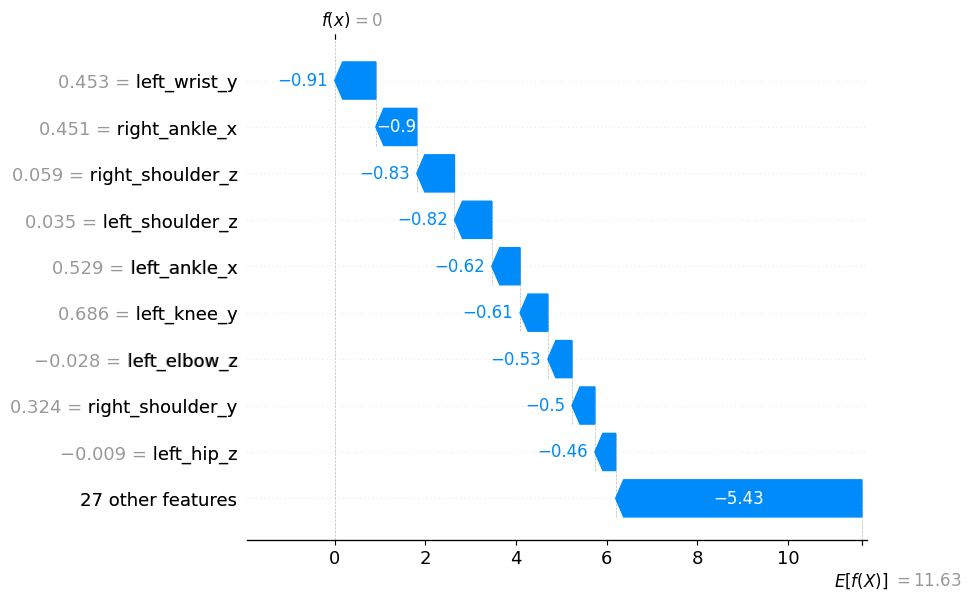

In [40]:
shap.plots.waterfall(shap_values[29])

In [37]:
len(shap_values)

30

In [10]:
random_tree_model.classes_

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21], dtype=int64)

In [13]:
data_dice = dice_ml.Data(dataframe=pd.concat([X_train_feature_eng, pd.Series(y_train, name="label")], axis=1),
                         continuous_features=features, outcome_name="label")

model_dice = dice_ml.Model(model=random_tree_model, backend="sklearn")
exp = dice_ml.Dice(data_dice, model_dice, method="random")

In [14]:
y_test[0]

0

100%|██████████| 1/1 [00:04<00:00,  4.02s/it]

Query instance (original outcome : 0)


,left_shoulder_x,left_shoulder_y,left_shoulder_z,right_shoulder_x,right_shoulder_y,right_shoulder_z,left_elbow_x,left_elbow_y,left_elbow_z,right_elbow_x,...,right_knee_x,right_knee_y,right_knee_z,left_ankle_x,left_ankle_y,left_ankle_z,right_ankle_x,right_ankle_y,right_ankle_z,label
0,0.708441,0.429699,-0.374545,0.528477,0.404475,-0.010646,0.678803,0.688422,-0.464527,0.464564,...,0.508428,1.148376,0.434193,0.588338,1.385647,0.339729,0.500013,1.388455,0.852477,0



Diverse Counterfactual set (new outcome: 7)


,left_shoulder_x,left_shoulder_y,left_shoulder_z,right_shoulder_x,right_shoulder_y,right_shoulder_z,left_elbow_x,left_elbow_y,left_elbow_z,right_elbow_x,...,right_knee_x,right_knee_y,right_knee_z,left_ankle_x,left_ankle_y,left_ankle_z,right_ankle_x,right_ankle_y,right_ankle_z,label
0,0.708441,0.429699,0.803375,0.528477,0.404475,-0.010646,0.678803,0.688422,-0.464527,0.464564,...,0.508428,-0.13412,0.434193,0.588338,1.385647,-1.079044,0.500013,1.388455,0.852477,7


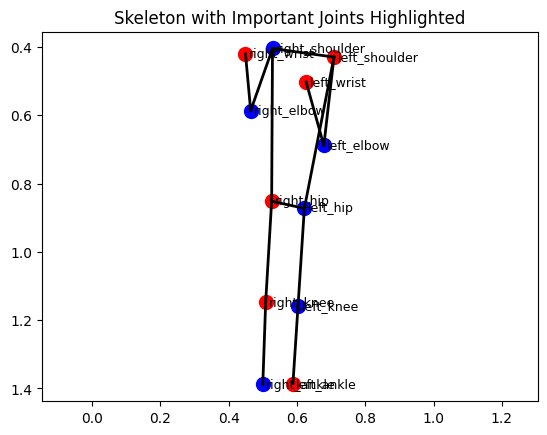

In [35]:
n = 1

query_instance = X_test_feature_eng.iloc[[n]]  # Note the double brackets to keep it as DataFrame

cf = exp.generate_counterfactuals(query_instance, total_CFs=1, desired_class=7)
cf.visualize_as_dataframe()

original = query_instance
counterfactual = cf.cf_examples_list[0].final_cfs_df.iloc[0]

diffs = (counterfactual - original).abs()
important_joints = set()
for joint in joints:
    if any(diffs[f'{joint}_{axis}'].item() > 0.01 for axis in ['x', 'y', 'z']):
        important_joints.add(joint)

plot_skeleton(original.to_dict(), highlighted_joints=important_joints)

In [34]:
import matplotlib.pyplot as plt

def plot_skeleton(joint_coords, highlighted_joints=set()):
    connections = [
        ('shoulder', 'elbow'), ('elbow', 'wrist'),
        ('hip', 'knee'), ('shoulder', 'hip'), ('knee', 'ankle') 
    ]
    for j1, j2 in connections:
        x = [joint_coords[f'right_{j1}_x'][n], joint_coords[f'right_{j2}_x'][n]]
        y = [joint_coords[f'right_{j1}_y'][n], joint_coords[f'right_{j2}_y'][n]]
        plt.plot(x, y, 'k-', linewidth=2)

        x = [joint_coords[f'left_{j1}_x'][n], joint_coords[f'left_{j2}_x'][n]]
        y = [joint_coords[f'left_{j1}_y'][n], joint_coords[f'left_{j2}_y'][n]]
        plt.plot(x, y, 'k-', linewidth=2)

    x = [joint_coords[f'right_hip_x'][n], joint_coords[f'left_hip_x'][n]]
    y = [joint_coords[f'right_hip_y'][n], joint_coords[f'left_hip_y'][n]]
    plt.plot(x, y, 'k-', linewidth=2)

    y = [joint_coords[f'right_shoulder_y'][n], joint_coords[f'left_shoulder_y'][n]]
    x = [joint_coords[f'right_shoulder_x'][n], joint_coords[f'left_shoulder_x'][n]]
    plt.plot(x, y, 'k-', linewidth=2)

    for joint in joints:
        x = joint_coords[f'{joint}_x'][n]
        y = joint_coords[f'{joint}_y'][n]
        color = 'red' if joint in highlighted_joints else 'blue'
        plt.scatter(x, y, c=color, s=100)
        plt.text(x+0.01, y+0.01, joint, fontsize=9)

    plt.gca().invert_yaxis()
    plt.axis('equal')
    plt.title("Skeleton with Important Joints Highlighted")
    plt.show()